<a href="https://colab.research.google.com/github/VinothDevakumar/Hello-World/blob/master/Amazon_fine_food_reviews_with_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Amazon fine food reviews clssification

## Read the data

In [1]:
import pandas as pd

## 1. Collecting the dataset

In [4]:
data=pd.read_csv("/content/Reviews.csv")

In [5]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0.0,1.0,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,4.0,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,2.0,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0.0,0.0,5.0,1.350778e+09,Great taffy,Great taffy at a great price. There was a wid...


## 2.Perfom EDA on the dataset

In [6]:
data.shape

(16243, 10)

In [7]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [8]:
df=data[0:50000]

In [9]:
# Print the shape of the DataFrame
print(f'The DataFrame has {df.shape[0]} rows and {df.shape[1]} columns.')

The DataFrame has 16243 rows and 10 columns.


In [10]:
print('The DataFrame has '+str(df.shape[0])+' rows and '+str(df.shape[1])+' columns.')

The DataFrame has 16243 rows and 10 columns.


In [11]:
# Print the number of unique products
print(f'There are {df["ProductId"].nunique()} unique products.')

There are 2241 unique products.


In [12]:
df["ProductId"].nunique()

2241

In [13]:
df["Score"].nunique()

5

In [14]:
print(df['Score'].value_counts())

Score
5.0    10197
4.0     2312
1.0     1497
3.0     1349
2.0      887
Name: count, dtype: int64


In [15]:
import matplotlib.pyplot as plt

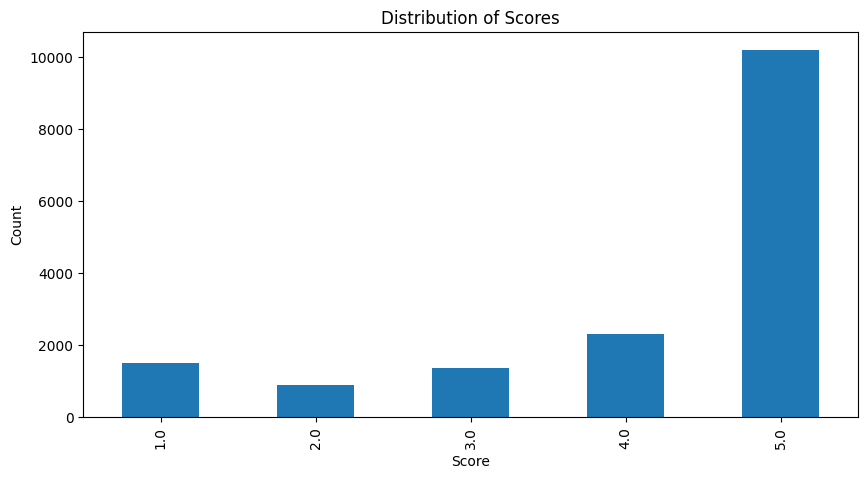

In [16]:
plt.figure(figsize=(10, 5))
df['Score'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

## 3. Pre processing

In [17]:
from imblearn.under_sampling import RandomUnderSampler

In [18]:
rus = RandomUnderSampler(random_state=52)

In [21]:
X_resampled, y_resampled = rus.fit_resample(df[['Summary','Text']], df['Score'])

In [22]:
X_resampled

,Summary,Text
0,amish popcorn,worst popcorn ive ever bought. chewy not fluf...
1,Awful,This tea is the most awful stuff I've ever put...
2,Garbage,Don't waste your money on any of the Kettle br...
3,Artificial taste,These cups are artifically sweetened with sucr...
4,Very disapointing!!,I received my order of Grove Square hot cocoa ...
...,...,...
4430,German Shepherd's Favorite,My girl has loved these for two years. When t...
4431,Scrumptious!,This is my favorite of the flavored coffees. I...
4432,Flavored Cream,This is a great buy for the price. I can't ge...
4433,Shortbread cookies,These shortbread cookies are delicious. I bou...


In [23]:
y_resampled

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
4430    5.0
4431    5.0
4432    5.0
4433    5.0
4434    5.0
Name: Score, Length: 4435, dtype: float64

In [24]:
df_resampled = pd.DataFrame(X_resampled, columns=['Summary','Text'])
df_resampled['Score'] = y_resampled

In [25]:
df_resampled.head()

,Summary,Text,Score
0,amish popcorn,worst popcorn ive ever bought. chewy not fluf...,1.0
1,Awful,This tea is the most awful stuff I've ever put...,1.0
2,Garbage,Don't waste your money on any of the Kettle br...,1.0
3,Artificial taste,These cups are artifically sweetened with sucr...,1.0
4,Very disapointing!!,I received my order of Grove Square hot cocoa ...,1.0


In [26]:
df_resampled.shape

(4435, 3)

In [27]:
df=df_resampled

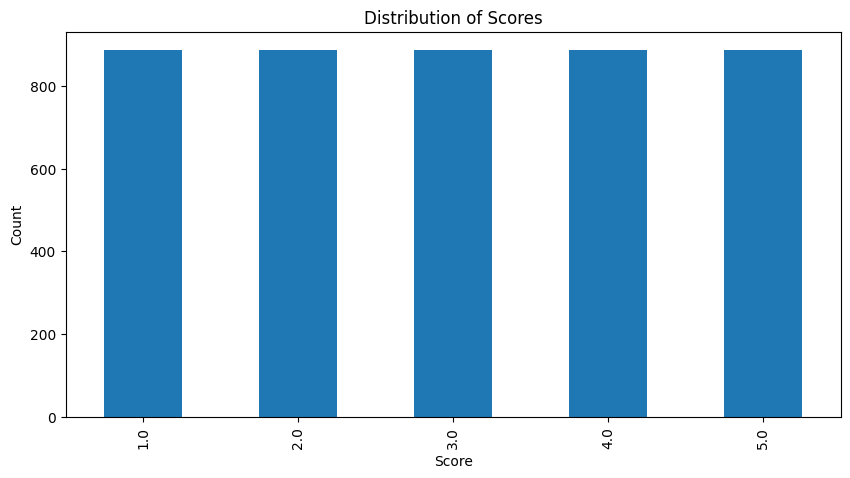

In [28]:
plt.figure(figsize=(10, 5))
df['Score'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

In [29]:
df.head()

,Summary,Text,Score
0,amish popcorn,worst popcorn ive ever bought. chewy not fluf...,1.0
1,Awful,This tea is the most awful stuff I've ever put...,1.0
2,Garbage,Don't waste your money on any of the Kettle br...,1.0
3,Artificial taste,These cups are artifically sweetened with sucr...,1.0
4,Very disapointing!!,I received my order of Grove Square hot cocoa ...,1.0


### Removing null value

In [30]:
df=df.dropna()

In [ ]:
df.shape

(14068, 3)

## Text pre processing

## 1.stop words
## 2. remove special charechter
## 3. convert the text to lower case
## 3. stemming
## 4. lematization

In [31]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re

In [32]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [33]:
nltk.__version__

'3.8.1'

In [34]:
def pre_proces(text):
    # converting the text into lowercase
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()

    # defining new variable to store pre processed text
    final_val=[]
    text=text.lower()
    # remove special charechters.
    text = re.sub(r'\W', ' ', text)
    # creating the tokens from the text
    tokens = word_tokenize(text)
    for token in tokens:
        # removing the stop words
        if token not in stopwords.words('english'):
            # perfoming the stemming
            token=stemmer.stem(token)
            # perfoming the lemmatization
            token=lemmatizer.lemmatize(token)
            # appending the final to the result
            final_val.append(token)
    return final_val

In [ ]:
pre_proces("A dog is barking at a man")

['dog', 'bark', 'man']

In [35]:
df['Summary'] = df['Summary'].apply(pre_proces)
df['Text'] = df['Text'].apply(pre_proces)

In [ ]:
df.head()

,Summary,Text,Score
29960,"[folger, price]","[price, good, stretch, imagin, coffe, great, b...",1
925,"[toss, 9, 12, jar]","[three, jar, came, form, edibl, babi, rest, fi...",1
40261,"[sand, sugar]","[way, overpr, receiv, small, amount, 4oz, orde...",1
46870,"[dissapoint, product]","[love, coconut, oil, cook, skin, care, mix, fo...",1
42338,"[terribl, low, qualiti, press, bit, tini, bag]","[turkey, jerki, realli, bad, qualiti, jerki, c...",1


## 4. Vectorizing the data embedding

In [36]:
## TF-IDF VECTORIZING
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
vectorizer = TfidfVectorizer()

In [38]:
df['Text'].apply(' '.join)

0       worst popcorn ive ever bought chewi fluffi gav...
1       tea aw stuff ever put mouth chemic tast tri ad...
2       wast money kettl brand potato chip bought case...
3       cup artif sweeten sucralos realiz tri one end ...
4       receiv order grove squar hot cocoa mix today s...
                              ...                        
4430    girl love two year local retail outlet trader ...
4431    favorit flavor coffe usual fan coconut coffe d...
4432    great buy price get kind deal anywher local bu...
4433    shortbread cooki delici bought london summer h...
4434    feed blue buffalo food golden retriev almost 3...
Name: Text, Length: 4435, dtype: object

In [39]:
X = vectorizer.fit_transform(df['Text'].apply(' '.join))

In [40]:
X.shape

(4435, 9334)

In [41]:
X[0]

<1x9334 sparse matrix of type '<class 'numpy.float64'>'
	with 17 stored elements in Compressed Sparse Row format>

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## 5. Train test split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, df['Score'], test_size=0.2, random_state=42)

In [44]:
X_train

<3548x9334 sparse matrix of type '<class 'numpy.float64'>'
	with 119974 stored elements in Compressed Sparse Row format>

In [45]:
y_train.shape

(3548,)

In [46]:
X_test.shape

(887, 9334)

## 6. Selecting the model

## knn

In [51]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=50)

In [52]:
neigh.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=50)

In [53]:
y_pred=neigh.predict(X_test)

In [54]:

# Print individual performance metrics
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, average='weighted'))
print("Recall: ", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score: ", f1_score(y_test, y_pred, average='weighted'))

Accuracy:  0.3528748590755355
Precision:  0.36569904833311173
Recall:  0.3528748590755355
F1 Score:  0.35696388337882284


## Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

## svm

In [ ]:
from sklearn import svm
clf = svm.SVC()

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

## Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()